<a href="https://colab.research.google.com/github/ydchen17/SeizureDetection/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, auc, roc_curve

# Load data

In [ ]:
!curl -O https://raw.githubusercontent.com/ydchen17/datasets/main/uci-epileptic-seizure-recognition.csv
df = pd.read_csv('uci-epileptic-seizure-recognition.csv', index_col=0)
df.info()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 7445k  100 7445k    0     0  15.2M      0 --:--:-- --:--:-- --:--:-- 15.2M
<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, x1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


# PCA

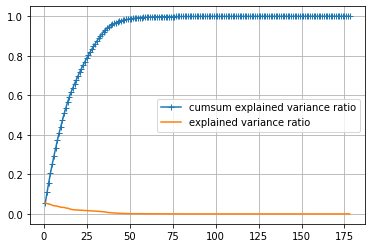

In [ ]:
X = df.drop('y' ,axis = 1)
y = df['y']

SS = StandardScaler()
SS.fit(X)
SS_X = SS.transform(X)

pca = PCA()
pca.fit(SS_X)
variance_ratios = pca.explained_variance_ratio_
cumsum_variance_ratios = np.cumsum(variance_ratios)

plt.plot(range(1,179),cumsum_variance_ratios, marker = '+' , label = 'cumsum explained variance ratio')
plt.plot(range(1,179),variance_ratios , label = 'explained variance ratio')
plt.grid()
plt.legend()
plt.show()

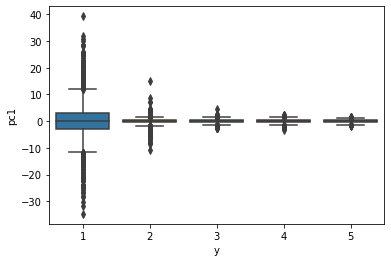

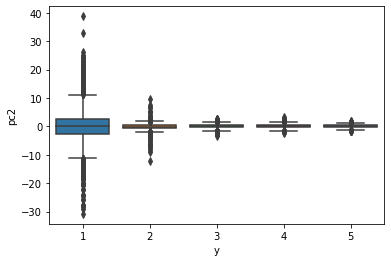

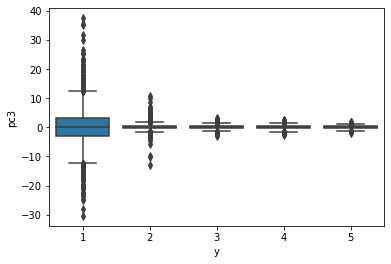

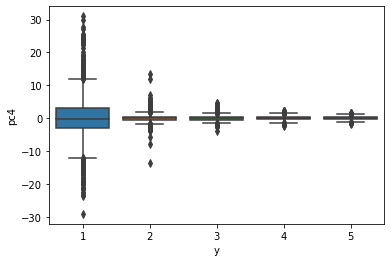

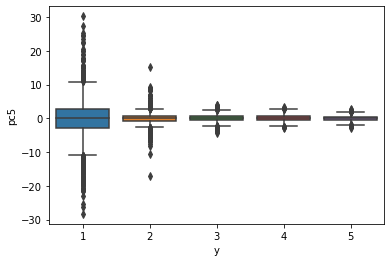

In [ ]:
pca = PCA(n_components=0.95)
pca.fit(SS_X)
pca_X = pca.transform(SS_X)
pca_df = pd.DataFrame(pca_X, columns=['pc{}'.format(i) for i in range(1,40)],
                     index = df.index)
pca_df['y'] = df['y']

for i in range(1,6):
    sns.boxplot(x = 'y', y = 'pc{}'.format(i), data = pca_df)
    plt.show()

In [ ]:
X, len(pca_X[1]), y[1]

(             x1   x2   x3   x4   x5   x6  ...  x173  x174  x175  x176  x177  x178
 column_a                                  ...                                    
 X21.V1.791  135  190  229  223  192  125  ...   -77  -103  -127  -116   -83   -51
 X15.V1.924  386  382  356  331  320  315  ...   152   157   156   154   143   129
 X8.V1.1     -32  -39  -47  -37  -32  -36  ...    19   -12   -30   -35   -35   -36
 X16.V1.60  -105 -101  -96  -92  -89  -95  ...   -77   -85   -77   -72   -69   -65
 X20.V1.54    -9  -65  -98 -102  -78  -48  ...   -32   -41   -65   -83   -89   -73
 ...         ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...   ...
 X22.V1.114  -22  -22  -23  -26  -36  -42  ...     5    -1   -18   -37   -47   -48
 X19.V1.354  -47  -11   28   77  141  211  ...    14    27    48    77   117   170
 X8.V1.28     14    6  -13  -16   10   26  ...   -62   -67   -30    -2    -1    -8
 X10.V1.932  -40  -25   -9  -12   -2   12  ...   143   116    86    68    59    55
 X16

In [ ]:
pca_X[2], y[2]

(array([ 0.49565   , -0.26166014,  0.93121018, -0.66378903,  1.58761825,
        -1.60494193, -0.88083027, -1.59195933, -0.40087335, -1.43507284,
         0.93067355,  0.25819197,  0.86142375, -0.71904709, -0.13400545,
        -1.14179614,  0.1237091 , -0.76124114, -0.10724948,  0.21383067,
        -0.09283854, -0.71202706,  0.37251047,  0.5208364 ,  0.46324851,
         0.41631831,  0.2955793 , -0.49150145, -0.00650425,  0.12468563,
         0.02733336,  0.94695457,  0.82733111, -0.61187178,  0.38929488,
        -0.49063018,  0.01572865, -0.18017464,  0.04822058]), 5)

# models
## Logistic

In [ ]:
estimator = LogisticRegression()
param_grid = {'C': np.logspace(-2,5,40) }
LogGS = GridSearchCV(estimator, param_grid)
LogGS.fit(pca_X, y)
best_Log = LogGS.best_estimator_

In [ ]:
LogGS.best_estimator_

LogisticRegression(C=0.18047217668271703, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
get_metrics(best_Log, pca_X, y)

(0.2637391304347826,
 0.2637391304347826,
 0.2579574934283528,
 0.25101543274709315,
 0.5615545236294897)

## SVM

In [ ]:
estimator = SVC(probability=True)
param_grid = {'degree': range(2,8),  'C': np.logspace(-2,5,20)}
param_grid = { 'C': np.logspace(-2,4,4)}
SvmGS = GridSearchCV(estimator, param_grid)
SvmGS.fit(pca_X, y)
best_SVM = SvmGS.best_estimator_

In [ ]:
best_SVM

SVC(C=10000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
get_metrics(best_SVM, pca_X, y)

(0.9719130434782609,
 0.971913043478261,
 0.9721463767929824,
 0.9719946691455936,
 0.9860932098298676)

## KNN

In [ ]:
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': range(2,21)}
KNNGS = GridSearchCV(estimator, param_grid)
KNNGS.fit(pca_X, y)
best_KNN = KNNGS.best_estimator_

In [ ]:
best_KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
get_metrics(best_KNN, pca_X, y)

(0.7628695652173914,
 0.7628695652173911,
 0.8317636903436254,
 0.7468900258463871,
 0.9788178109640832)

## Naive Bayes

In [ ]:
pca_X_train, pca_X_test, y_train, y_test = train_test_split(pca_X, y, train_size=0.7)
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(pca_X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
get_metrics(Naive_Bayes, pca_X, y)

(0.5996521739130435,
 0.5996521739130435,
 0.6169899543556436,
 0.5924678910352354,
 0.870227286389414)

## ANN

In [ ]:
estimator = MLPClassifier(max_iter=1000)
param_grid = {'hidden_layer_sizes': [64,128,256,512]}
MLPGS = GridSearchCV(estimator, param_grid)
MLPGS.fit(pca_X, y)
best_MLP = MLPGS.best_estimator_

In [ ]:
best_MLP

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=512, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [ ]:
get_metrics(best_MLP, pca_X, y)

(1.0, 1.0, 1.0, 1.0, 1.0)

## RF

In [ ]:
estimator = RandomForestClassifier()
param_grid = {'max_depth': range(2,10), 'max_features': range(2,35)}
RFGS = GridSearchCV(estimator, param_grid)
RFGS.fit(pca_X, y)
best_RF = RFGS.best_estimator_

In [ ]:
best_RF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
get_metrics(best_RF, pca_X, y)

(0.6464347826086957,
 0.6464347826086956,
 0.6938160218225586,
 0.6209681802214962,
 0.9050548903591682)

## GradientBoosting

In [ ]:
estimator = GradientBoostingClassifier()
param_grid = {'max_depth': range(2,10), 'max_features': ['auto', 'sqrt', 'log2']}
GBGS = GridSearchCV(estimator, param_grid)
GBGS.fit(pca_X, y)
best_GB = GBGS.best_estimator_

In [ ]:
best_GB

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

 # Model Evaluation

In [ ]:
pca_X_train, pca_X_test, y_train, y_test = train_test_split(pca_X, y, train_size=0.7)

In [ ]:
def get_metrics(clf, pca_X, y ):
    y_pred = clf.predict(pca_X)
    y_proba = clf.predict_proba(pca_X)
    accuracy = accuracy_score(y, y_pred)
    recall = recall_score(y, y_pred, average = 'macro')
    precision = precision_score(y, y_pred, average = 'macro')
    f1 = f1_score(y, y_pred, average = 'macro')

    onehot_proba = []
    onehot_y = []
    for i in range(5):
        temp_proba = y_proba[:,i]
        temp_y = np.where( y == i+1, 1, 0 )
        onehot_proba.append(temp_proba)
        onehot_y.append(temp_y)

    ravel_onehot_proba = np.array(onehot_proba).ravel()
    ravel_onehot_y = np.array(onehot_y).ravel()
    fpr,tpr,threshold = roc_curve(ravel_onehot_y, ravel_onehot_proba) 
    roc_auc = auc(fpr,tpr)
    return accuracy, recall, precision, f1, roc_auc

In [ ]:
LogGS = LogisticRegression(C=0.18047217668271703, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogGS.fit(pca_X_train, y_train)
get_metrics(LogGS, pca_X_test, y_test)

(0.25731671979136483,
 0.25933462016806924,
 0.2680541107988606,
 0.2361745148534024,
 0.5581384823636386)

In [ ]:
SvmGS = SVC(C=10000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
SvmGS.fit(pca_X_train, y_train)
get_metrics(SvmGS, pca_X_test, y_test)

(0.6992176180817155,
 0.6978567805700362,
 0.6949960091352647,
 0.6957022420871409,
 0.928354352162632)

In [ ]:
KNNGS = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
KNNGS.fit(pca_X_train, y_train)
get_metrics(KNNGS, pca_X_test, y_test)

(0.5189800057954216,
 0.520112979268297,
 0.6068764691320528,
 0.5071978882913878,
 0.7598747199796194)

In [ ]:
Naive_Bayes = GaussianNB()
Naive_Bayes.fit(pca_X_train, y_train)
get_metrics(Naive_Bayes, pca_X_test, y_test)

(0.6296725586786439,
 0.6253076987440641,
 0.6290257921413976,
 0.6173272058706832,
 0.8827148296543209)

In [ ]:
MLPGS = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=512, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
MLPGS.fit(pca_X_train, y_train)
get_metrics(MLPGS, pca_X_test, y_test)

(0.7154447986090988,
 0.7145466392579837,
 0.7132275841280404,
 0.7132792741174283,
 0.9357875555621983)

In [ ]:
RFGS = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RFGS.fit(pca_X_train, y_train)
get_metrics(RFGS, pca_X_test, y_test)

(0.6241669081425674,
 0.6205316859232026,
 0.6266516406850945,
 0.5864959925910351,
 0.896210397147598)

In [ ]:
GBGS = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=9,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GBGS.fit(pca_X_train, y_train)
get_metrics(GBGS, pca_X_test, y_test)

(0.726745870762098,
 0.7251130022842605,
 0.7208289418583533,
 0.7217615973019967,
 0.944389058694052)